# Binary classification project: Supervised learning

- The objective of this project is to develop a supervised learning model that can predict financial risk for agricultural enterprises. 

- The dataset farm_data_train.csv for training contains farms which are categorized into two groups: 'healthy' and 'defaulting' farms. 

- The aim is to construct a financial risk detection score applicable to agricultural operations. For this purpose, a set of financial ratios has been measured for each agricultural operation. 

In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from classification_workflow import *
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns

In [2]:
dict_models = {'Logistic Regression': {
        'model': LogisticRegression(),
        'param_grid': {
            'C': [0.0001, 0.01, 0.1, 1, 10, 100], # regulirization, inverse of lambda
            'fit_intercept': [True, False],  # True = interception is added
            'intercept_scaling': [1, 10, 100, 150]  # 
        }
    }
}

# Exploring the dataset
**The first step is to explore our data to make sure whether it is clean or contains outliers.**

In [3]:
#Explore the data 
farm= pd.read_csv('farm_data_train.csv')
farm.head()
farm.info()
nan_count = farm[farm.isna().any(axis=1)].shape[0]
print(f"Number of rows : {len(farm)}")
print(f"Number of rows with at least one NAN value: {nan_count}")
print(f"{round(nan_count/len(farm) * 100)}% of our rows have at least one"
      f" missing value")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R2      945 non-null    float64
 1   R14     945 non-null    float64
 2   R17     945 non-null    float64
 3   R32     945 non-null    float64
 4   DIFF    945 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.0 KB
Number of rows : 945
Number of rows with at least one NAN value: 0
0% of our rows have at least one missing value


1. **Comment: The data doesn't contain NaN values. No missed values.**

In [4]:
farm.sample(6)

,R2,R14,R17,R32,DIFF
918,0.000,1.12380,0.0428,0.05513,1
803,0.777,0.29710,0.0727,0.36650,0
570,0.661,0.23750,0.0758,0.21610,0
778,0.786,0.37480,0.0778,0.15620,1
127,0.664,0.07379,0.0361,0.39170,0
602,0.505,1.15190,0.0652,0.16200,1


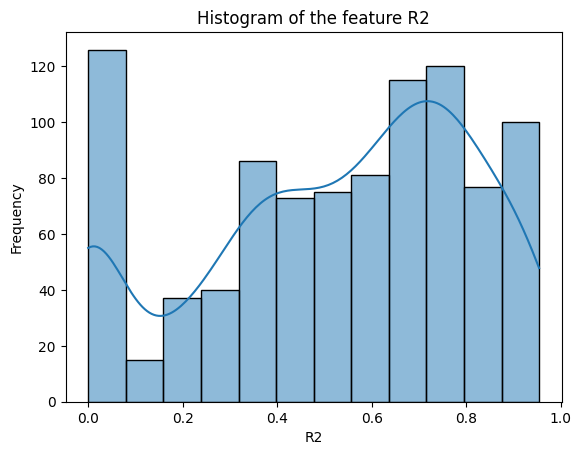

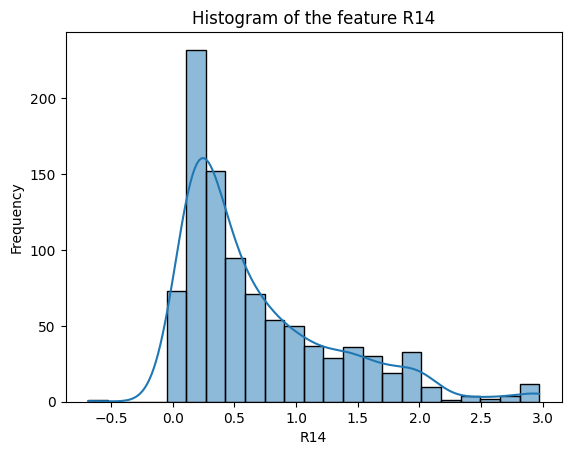

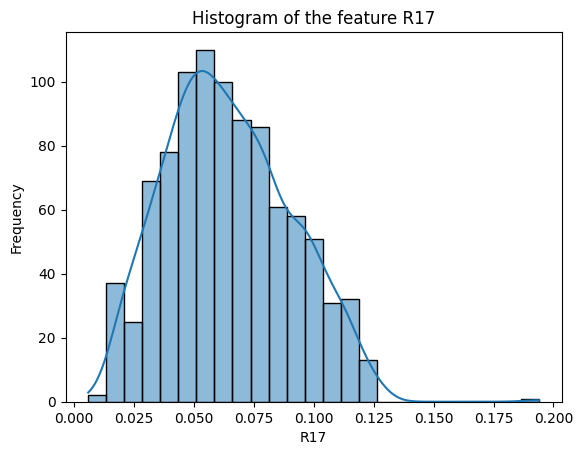

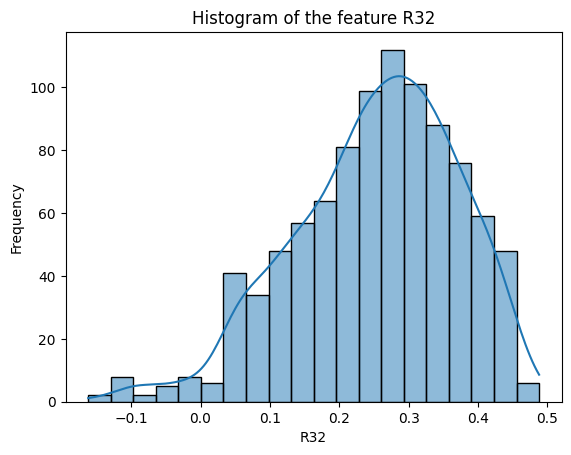

In [5]:
#Visualize the data
columns = farm.iloc[:,:-1].select_dtypes(include=['int64', 'float64']).columns.tolist()
if not columns :
        farm.hist(bins=10, figsize=(15, 10))
        plt.suptitle('Distribution of Numerical Columns', y=0.92)
        plt.show()
else :
        for c in columns :
            # Plot a histogram
            sns.histplot(farm[c], kde=True)
            plt.title(f'Histogram of the feature {str(c)}')
            plt.xlabel(str(c))
            plt.ylabel('Frequency')
            plt.show()

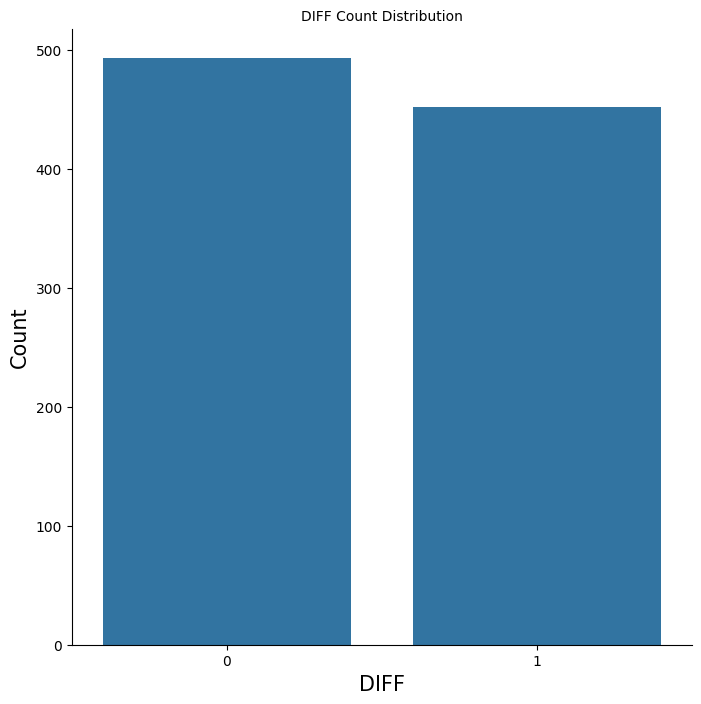

In [6]:
#Histogram of DIFF
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.countplot(x = 'DIFF', data = farm)
ax.set_xlabel('DIFF', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('DIFF Count Distribution', fontsize=10)
sns.despine()

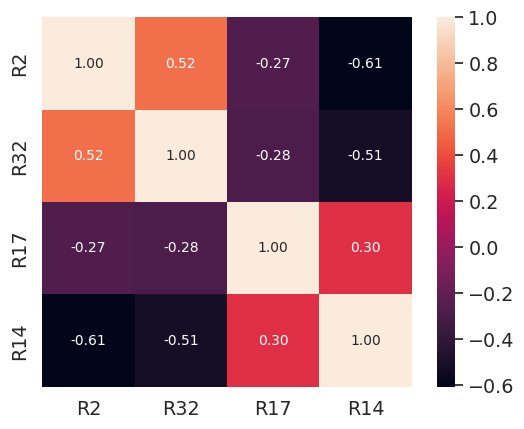

In [7]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
import numpy as np
farm_final = farm[['R2', 'R14', 'R17','R32']]
corrmat = farm_final.corr()
cols = corrmat.nlargest(k, 'R2')['R2'].index
cm = np.corrcoef(farm[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

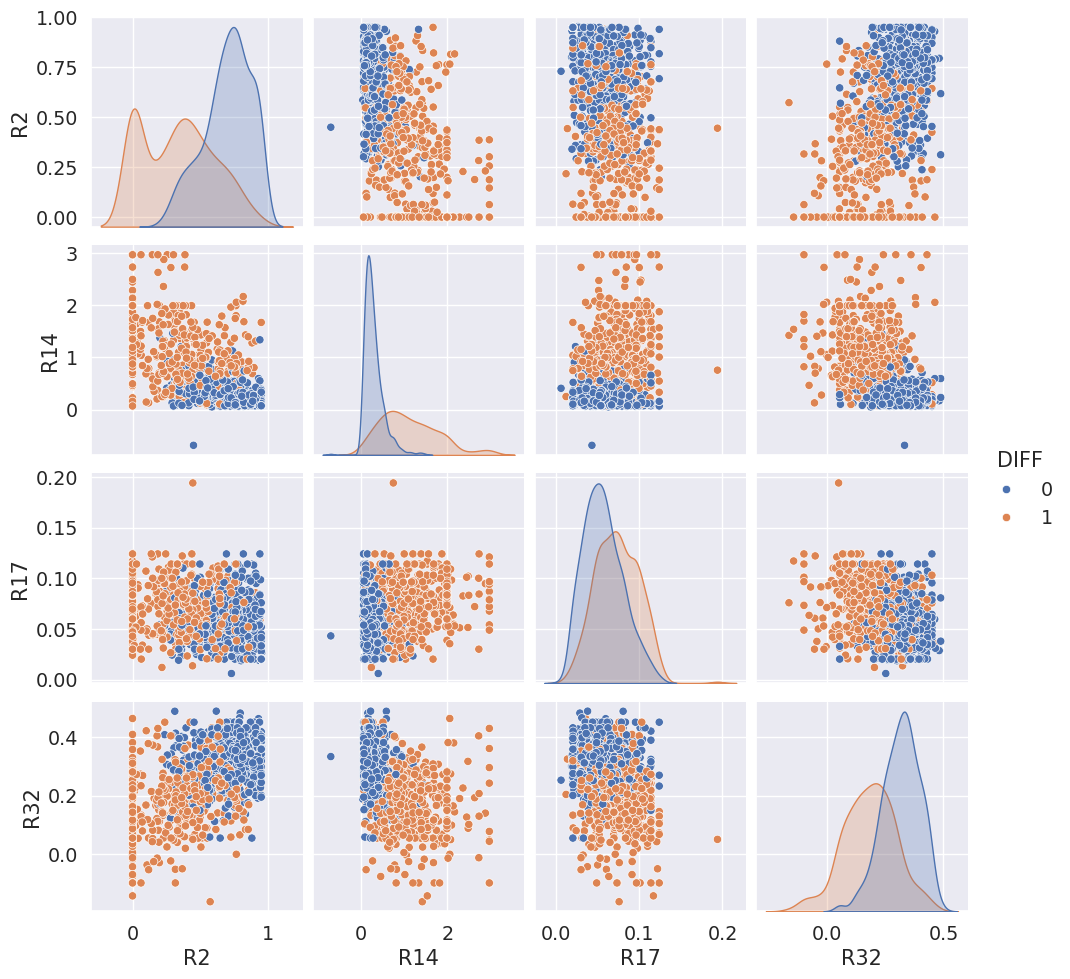

In [8]:
#Pairplot matrix (Matrice de dispersion)
pp=sns.pairplot(farm, hue='DIFF', corner=False)

# Standardization & Normalization

## Reminder

1. MinMaxScaler:

$$ X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

2. StandardScaler:

$$ X_{\text{scaled}} = \frac{X - \mu}{\sigma} $$

3. RobustScaler:

$$ X_{\text{scaled}} = \frac{X - \text{médiane}}{\text{IQR}} $$

- $\text{IQR}$: l'écart interquartile (interquartile range).

In [35]:
#minmax, standard, robust 
minmax, standard, robust = standardization(farm)


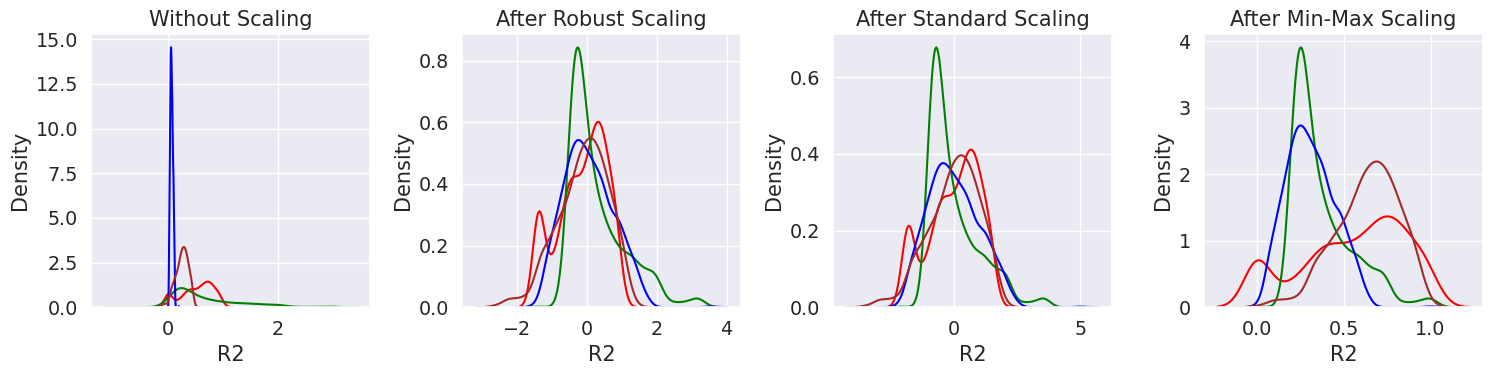

In [34]:
#Plot the densities of R2, R14, R17, R32 before and after scaling
plot_densities(farm)

# Logistic regression

### Without scaling

In [36]:
X = farm.drop(['DIFF'],axis=1) # 'R17','R32',
y = farm['DIFF'] #Target

Going through each model defined in the dictionnary...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/home/naim/Bureau/Analyse de données/Data/Projets/classification_workflow.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame([new_row])], ignore_index=True)


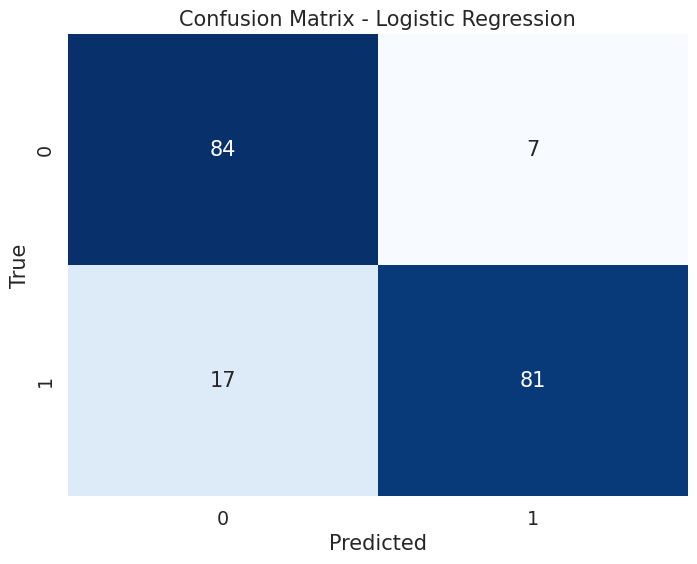

Model: Logistic Regression
Accuracy: 0.873015873015873
Precision: 0.9204545454545454
Recall: 0.826530612244898
ROC-AUC: 0.9533527696793003




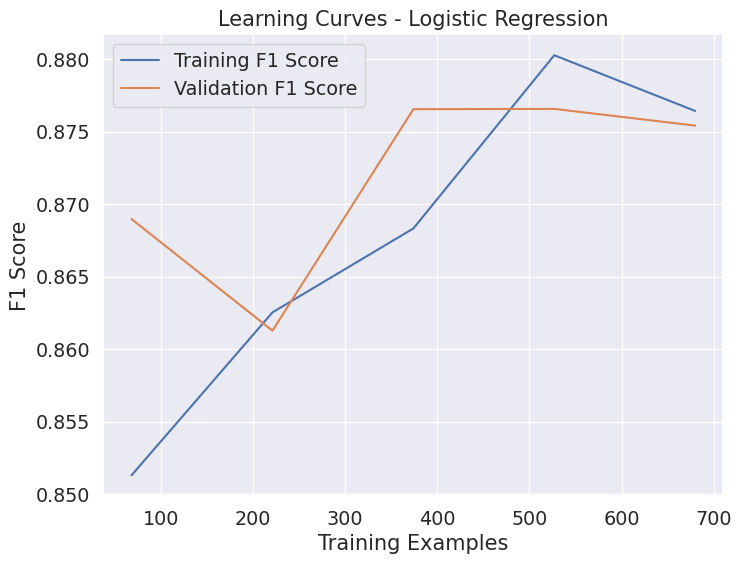

Going through each model defined in the dictionnary...: 100%|██████████| 1/1 [00:04<00:00,  4.76s/it]


,Model Name,f1 scoring on farm data(%)
0,Logistic Regression,87.100000


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=213)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=40)
display_results(dict_models, X_train, y_train, X_test, y_test, cv, 'f1 scoring on farm data(%)')

### Metrics to evaluate our model

- **Accuracy**: we reach nearly 87% of accuracy on our testing data.

- **Precision**: the model is able to correctly identify all positive instances with a precision score above 90%.

- **F1 Score**: the F1 score is a harmonic mean of precision and recall, which gives equal weight to both false posit.

- **ROC-AUC**: AUC is above 95%, indicating that our model performs well.

In [33]:
farm_test =pd.read_csv('farm_data_test.csv')
farm_test.head()

,R2,R14,R17,R32
0,0.837,0.07867,0.1110,0.3084
1,0.451,0.27970,0.0437,0.3479
2,0.230,0.90930,0.0562,0.1669
3,0.000,1.79410,0.1060,-0.0979
4,0.316,0.33330,0.0825,0.3357
